# <center> Decision Tree Classifier with Randomized Search
Decision tree is trained on feature set 2

## <font color='royalblue'>Get the data

In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from collections import defaultdict
from time import time
import pickle  
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 3.00880939,  0.26443017,  1.05370334, ...
X_32_val                  -> array([[-0.13964146,  0.53184264, -0.71694033, ...
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[-0.1396414
X_32train_std             -> array([[-0.80277066, -0.49489511, -0.83240094, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[-0.006215
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 3.0088093
X_train                   -> array([[[-0.01174874, -0.00817356, -0.0042913 , ..
X_train_std               -> array([[-0.80277066, -0.49489511, -0.83240094, ...
snrs                      -> [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 
y_16_val                  -> array([3, 5, 1, ..., 2, 4, 0])
y_32_test                 -> defaultdict(<class 'list'>, {0: array([2, 2, 3, ..
y_32_train                -> array([5, 0, 2, ..., 4, 6, 6])
y_32_val                  -> array([2, 

In [2]:
print("Training data: ", X_32train_std.shape, "and labels: ", y_32_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_32test_std), X_32test_std[18].shape, "arrays for SNR values:")
print(X_32test_std.keys())

Training data:  (80000, 32) and labels:  (80000,)
 
Test data:
Total 20 (4000, 32) arrays for SNR values:
dict_keys([0, -16, 2, 4, 6, 8, 12, 10, -20, -14, -18, 16, 18, -12, 14, -10, -8, -6, -4, -2])


## <font color='royalblue'>Train and test the classifier

In [3]:
#Train the classifier

params = {'max_depth': list(range(9,18)),'max_leaf_nodes': list(range(50, 150)), 'min_samples_split': [2,3,4],
          'max_features': [None,'auto','sqrt','log2'], 'criterion':['gini', 'entropy']}

rand_search_cv = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=0)

start = time()
print("Train decision tree classifier - randomized search for parameter optimization")
rand_search_cv.fit(X_32train_std, y_32_train)
print("Randomized search took %.2f minutes "%((time() - start)//60))
print("   ")
print("Result of randomized search:")
print(rand_search_cv.best_estimator_)

Train decision tree classifier - randomized search for parameter optimization
Randomized search took 0.00 minutes 
   
Result of randomized search:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=97, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


In [4]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy = defaultdict(list)

print("Test the classifier")
print(" ")
for snr in snrs:
    y_pred[snr] = rand_search_cv.predict(X_32test_std[snr])
    accuracy[snr] = metrics.accuracy_score(y_32_test[snr], y_pred[snr])
    print("Decision Tree's accuracy on %d dB SNR samples = "%(snr), accuracy[snr])   
    
accuracy = collections.OrderedDict(sorted(accuracy.items()))  #sort by ascending SNR value

Test the classifier
 
Decision Tree's accuracy on -20 dB SNR samples =  0.1205
Decision Tree's accuracy on -18 dB SNR samples =  0.125
Decision Tree's accuracy on -16 dB SNR samples =  0.13125
Decision Tree's accuracy on -14 dB SNR samples =  0.13175
Decision Tree's accuracy on -12 dB SNR samples =  0.149
Decision Tree's accuracy on -10 dB SNR samples =  0.1815
Decision Tree's accuracy on -8 dB SNR samples =  0.2745
Decision Tree's accuracy on -6 dB SNR samples =  0.358
Decision Tree's accuracy on -4 dB SNR samples =  0.39575
Decision Tree's accuracy on -2 dB SNR samples =  0.42425
Decision Tree's accuracy on 0 dB SNR samples =  0.4995
Decision Tree's accuracy on 2 dB SNR samples =  0.6085
Decision Tree's accuracy on 4 dB SNR samples =  0.7755
Decision Tree's accuracy on 6 dB SNR samples =  0.81775
Decision Tree's accuracy on 8 dB SNR samples =  0.823
Decision Tree's accuracy on 10 dB SNR samples =  0.82725
Decision Tree's accuracy on 12 dB SNR samples =  0.83075
Decision Tree's accura

## <font color='royalblue'> Visualize classifier performance

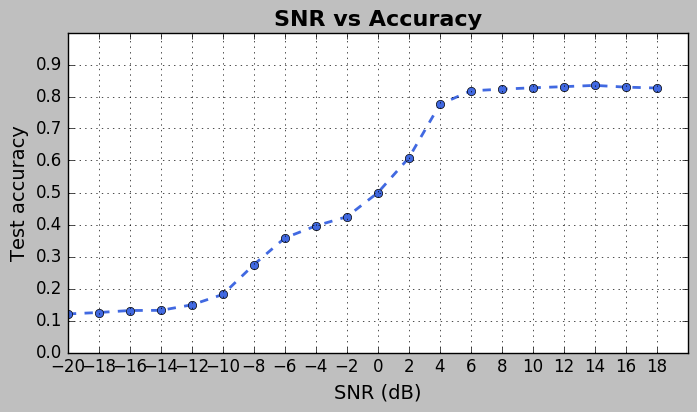

In [5]:
plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

In [3]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import pandas as pd

classes = ['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']
y_predicted = rand_search_cv.predict(X_32test_std[18])
conf_matrix = confusion_matrix(y_predicted, y_32_test[18]) 

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix Without Normalization")
print(df)

Confusion Matrix Without Normalization
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK    448     4      0     0     3     46     44    11
BPSK      1   477      0     0    13      3      6     3
CPFSK     5     0    497     2     0     16      9     0
GFSK     16     1      3   498     1      8     13     4
PAM4      2    18      0     0   483      7      9     3
QAM16     1     0      0     0     0    162    145     6
QAM64     7     0      0     0     0    238    270     2
QPSK     20     0      0     0     0     20      4   471


Confusion Matrix
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK   0.81  0.01   0.00  0.00  0.01   0.08   0.08  0.02
BPSK   0.00  0.95   0.00  0.00  0.03   0.01   0.01  0.01
CPFSK  0.01  0.00   0.94  0.00  0.00   0.03   0.02  0.00
GFSK   0.03  0.00   0.01  0.92  0.00   0.01   0.02  0.01
PAM4   0.00  0.03   0.00  0.00  0.93   0.01   0.02  0.01
QAM16  0.00  0.00   0.00  0.00  0.00   0.52   0.46  0.02
QAM64  0.01  0.00   0.00  0.00  0.00   0.46   0.52  0.00
QPSK   0.04  0.00   0.00  0.00  0.00   0.04   0.01  0.91


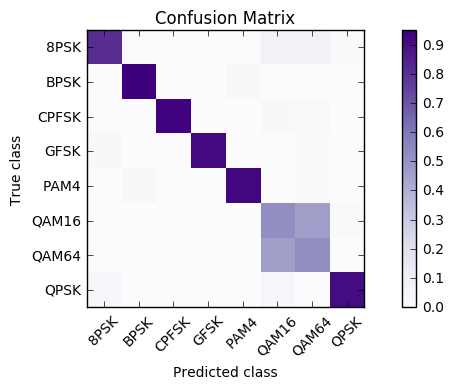

In [5]:
#Normalize the matrix

conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix.round(decimals = 2)

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix")
print(df)

fig1 = plt.figure(figsize=(8, 4), dpi=100)
plt.imshow(conf_matrix, interpolation = 'nearest', cmap = plt.cm.Purples)
ticks = np.arange(len(classes))
plt.title("Confusion Matrix")
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.tight_layout()
plt.colorbar()
plt.show()

In [6]:
from sklearn.externals import joblib

joblib.dump(rand_search_cv, "decision_tree3.1.pkl")

['decision_tree3.1.pkl']

In [2]:
import pickle
from sklearn.externals import joblib
rand_search_cv = joblib.load("decision_tree3.1.pkl")